In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
import seaborn as sns;sns.set()
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("wisc_bc_data.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
data.drop(['id','diagnosis'],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
sc.fit_transform(data)

array([[-0.51329651, -1.60559452, -0.54037561, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849, -0.93456583, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674,  0.28631171, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.07788929, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  2.03195239, ...,  1.24848623,
        -0.27624528,  0.15040866]])

In [12]:
kmean=KMeans(n_clusters=3)
kmean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
center=kmean.cluster_centers_
center

array([[1.24751725e+01, 1.84901166e+01, 8.05764103e+01, 4.88859207e+02,
        9.49148252e-02, 9.07750117e-02, 6.15064119e-02, 3.29390303e-02,
        1.77986946e-01, 6.35734266e-02, 3.01556410e-01, 1.21532704e+00,
        2.13489441e+00, 2.33540979e+01, 7.15913287e-03, 2.33434848e-02,
        2.84384956e-02, 1.05576713e-02, 2.06707646e-02, 3.74588648e-03,
        1.39398578e+01, 2.45990443e+01, 9.12271096e+01, 6.09272261e+02,
        1.30029254e-01, 2.22372145e-01, 2.16939503e-01, 9.04745711e-02,
        2.82924942e-01, 8.33942191e-02],
       [1.85285124e+01, 2.15790909e+01, 1.22283471e+02, 1.07481240e+03,
        1.00261240e-01, 1.41826612e-01, 1.61977355e-01, 9.20814050e-02,
        1.91676860e-01, 6.06204959e-02, 6.49142149e-01, 1.21641983e+00,
        4.56371901e+00, 7.68210744e+01, 6.61174380e-03, 3.13276529e-02,
        4.16239669e-02, 1.55374463e-02, 2.01668595e-02, 3.96714050e-03,
        2.23823967e+01, 2.87747107e+01, 1.49064463e+02, 1.54647107e+03,
        1.39227107e-01,

In [14]:
# kmeans clustering in an iteration 1 till 20 cluster size
cluster_range=range(1,20)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(data.iloc[:,:])
    cluster_errors.append(clusters.inertia_)

In [15]:
clusters_df=DataFrame({"num_clusters":cluster_range,'cluster_errors':cluster_errors})

In [16]:
clusters_df

,num_clusters,cluster_errors
0,1,2.566772e+08
1,2,7.794310e+07
2,3,4.726484e+07
3,4,2.922654e+07
4,5,2.053988e+07
5,6,1.655806e+07
6,7,1.326710e+07
7,8,1.124412e+07
8,9,9.447295e+06
9,10,8.386314e+06


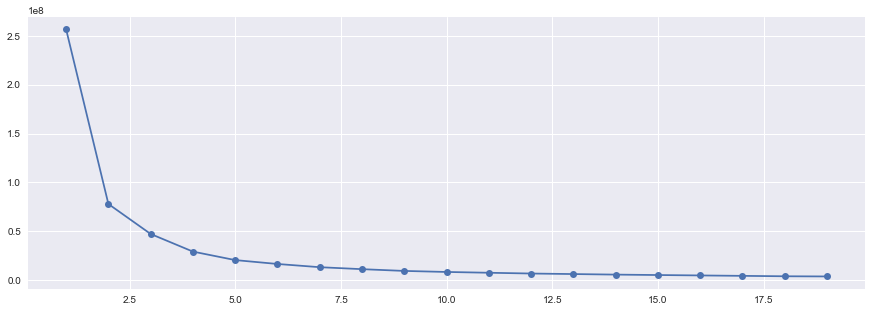

In [17]:
# elbow graph
plt.figure(figsize=(15,5))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

Scaling is not advaisable for every data set